<a href="https://colab.research.google.com/github/NguyenTienThuann/AI_ST7/blob/main/Mobie_robot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=ab20b046f0e3ad09a15f60777f0bc6b9b53c8e9c13c2294695610172c0027785
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


28.079710144927546


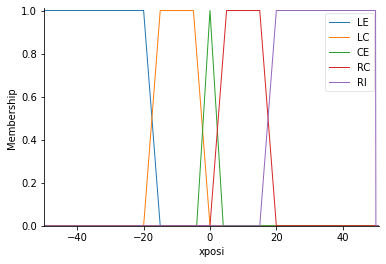

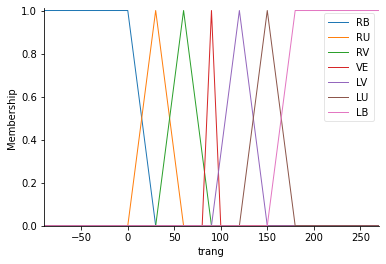

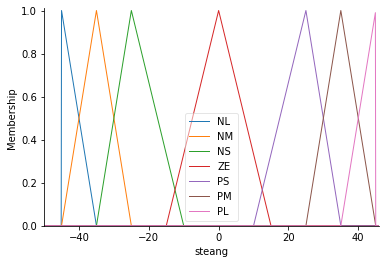

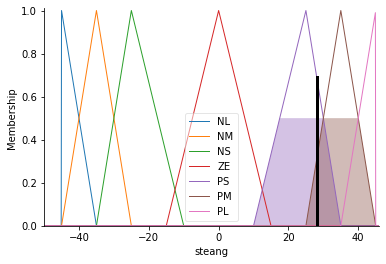

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 

xposi = ctrl.Antecedent(np.arange(-50,51,0.1),'xposi')
trang = ctrl.Antecedent(np.arange(-90,271,1),'trang')
steang = ctrl.Consequent(np.arange(-50,46,0.1),'steang')

xposi['LE']  =  fuzz.trapmf(xposi.universe,[-50,-50,-20,-15])
xposi['LC']  =  fuzz.trapmf(xposi.universe,[-20,-15,-5,0])
xposi['CE']  =  fuzz.trimf(xposi.universe,[-4,0,4])
xposi['RC']  =  fuzz.trapmf(xposi.universe,[0,5,15,20])
xposi['RI']  =  fuzz.trapmf(xposi.universe,[15,20,50,50])

xposi.view()


trang['RB'] = fuzz.trapmf(trang.universe,[-90,-90,0,30])
trang['RU'] = fuzz.trimf(trang.universe,[0,30,60])
trang['RV'] = fuzz.trimf(trang.universe,[30,60,90])
trang['VE'] = fuzz.trimf(trang.universe,[80,90,100])
trang['LV'] = fuzz.trimf(trang.universe,[90,120,150])
trang['LU'] = fuzz.trimf(trang.universe,[120,150,180])
trang['LB'] = fuzz.trapmf(trang.universe,[150,180,270,270])


trang.view()


steang['NL'] = fuzz.trimf(steang.universe,[-45,-45,-35])
steang['NM'] = fuzz.trimf(steang.universe,[-45,-35,-25])
steang['NS'] = fuzz.trimf(steang.universe,[-35,-25,-10])
steang['ZE'] = fuzz.trimf(steang.universe,[-15,0,15])
steang['PS'] = fuzz.trimf(steang.universe,[10,25,35])
steang['PM'] = fuzz.trimf(steang.universe,[25,35,45])
steang['PL'] = fuzz.trimf(steang.universe,[35,45,45])

steang.view()

rule1 = ctrl.Rule((xposi['LE']& trang['RB'])| (xposi['LC'] & trang['RB'])| (xposi['LE'] & trang['RU'])| (xposi['LC'] & trang['RU']) | (xposi['LE'] & trang['RV']) ,steang['NL'])
rule2 = ctrl.Rule((xposi['CE']& trang['RB'])| (xposi['RC'] & trang['RB'])| (xposi['CE'] & trang['RU'])| (xposi['LC'] & trang['RV']) | (xposi['LE'] & trang['VE'])  | (xposi['LE'] & trang['LV']) ,steang['NM'])
rule3 = ctrl.Rule((xposi['RI']& trang['RB'])| (xposi['RC'] & trang['RU'])| (xposi['CE'] & trang['RV'])| (xposi['LC'] & trang['LV']) | (xposi['LE'] & trang['LU']) ,steang['NS'])
rule4 = ctrl.Rule(xposi['CE']& trang['VE'] ,steang['ZE'])
rule5 = ctrl.Rule((xposi['RI']& trang['RU'])| (xposi['RC'] & trang['RV'])| (xposi['CE'] & trang['LV'])| (xposi['LC'] & trang['LU']) | (xposi['LE'] & trang['LB']) ,steang['PS'])
rule6 = ctrl.Rule((xposi['RI']& trang['RV'])| (xposi['RI'] & trang['VE'])| (xposi['RC'] & trang['VE'])| (xposi['RC'] & trang['LV']) | (xposi['CE'] & trang['LU'])| (xposi['CE'] & trang['LB']) | (xposi['LC'] & trang['LB'])    ,steang['PM'])
rule7 = ctrl.Rule((xposi['RI']& trang['LV'])| (xposi['RI']& trang['LU'])| (xposi['RC']& trang['LU'])| (xposi['RI']& trang['LB'])| (xposi['RC']& trang['LB']) ,steang['PL'])


awarding_ctrl = ctrl.ControlSystem([rule1,rule2, rule3,rule4,rule5,rule6,rule7])
awarding = ctrl.ControlSystemSimulation(awarding_ctrl)
awarding.input['xposi'] = 45
awarding.input['trang'] = 45
awarding.compute()
print(awarding.output['steang'])
steang.view(sim = awarding) 